CSE 351 Project

-Vinit Vala -Sergei Nezhevitz - Matthew Millington -

# Project #3: Fatal Force in the US

In the United States, use of deadly force by police has been a high-profile and contentious issue. 1000 people are shot and killed by US cops each year. The ever-growing argument is that the US has a flawed Law Enforcement system that costs too many innocent civilians their lives. In this project, we will analyze one of America’s hottest political topics, which encompasses issues ranging from institutional racism to the role of Law Enforcement personnel in society.
These are some import statements that import packages that are needed for this assignment.

# Cleaning the Data Process

### **1. Handling the missing values in the data set**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import numpy as np

In [2]:
data = pd.read_csv("/Users/snezhevets/Desktop/fatal_force/police_killings_train.csv")


In [3]:
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [4]:
data.count()

id                         2028
name                       2028
date                       2028
manner_of_death            2028
armed                      2022
age                        1991
gender                     2028
race                       1937
city                       2028
state                      2028
signs_of_mental_illness    2028
threat_level               2028
flee                       2001
body_camera                2028
dtype: int64

Data Cleaning: Observed number of rows from original source is 2028. We find that the armed, age, race and flee datas have multiple missing fields. We take care of each of the features in the most accurate way possible. 

In [5]:
missing_rows = data[data.isnull().any(axis=1)]

In [6]:
missing_rows.count()

id                         135
name                       135
date                       135
manner_of_death            135
armed                      129
age                         98
gender                     135
race                        44
city                       135
state                      135
signs_of_mental_illness    135
threat_level               135
flee                       108
body_camera                135
dtype: int64

In [7]:
df = pd.DataFrame(data)

first, we take care of the mising rows for 'age' using **mean** and **median** to fill in the data

In [8]:
age_count = df['age'].value_counts().sort_index()

In [9]:
# Calculate the mean age
mean_age = df['age'].mean()

# Calculate the median age
median_age = df['age'].median()

print("Mean age:", mean_age)
print("Median age:", median_age)

Mean age: 36.58061275740834
Median age: 34.0


In [10]:
# Replace missing age values with the median age as the age is skewed to the right
df['age'].fillna(mean_age, inplace=True)

second, we take care of the missing rows for 'armed', we delete those 6 rows of that are missing armed feature

In [11]:
missing_rows = df[df['armed'].isnull()]

In [12]:
# Remove rows with missing values in the specified feature only 6 rows removed
df.dropna(subset=['armed'], inplace=True)

third, we substitute the missing data for the 'race' with the probabilities for each of the races according to our training data

In [13]:
race_counts = df['race'].value_counts()

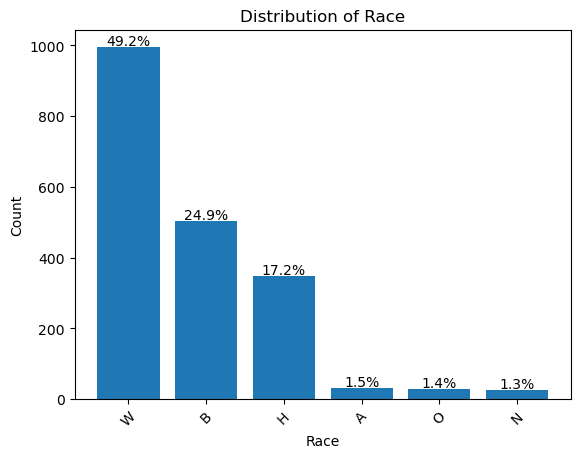

In [14]:
# Plot the bar graph
plt.bar(race_counts.index, race_counts.values)
race_percentages = (race_counts / len(df)) * 100


# Add percentage labels on top of each bar
for i, count in enumerate(race_counts.values):
    percentage = race_percentages[i]
    plt.text(i, count + 5, f"{percentage:.1f}%", ha='center')

# Add labels and title
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Distribution of Race')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [15]:
# Calculate the probabilities of each race
race_probabilities = df['race'].value_counts(normalize=True)

# Fill in missing race values with probabilities
missing_indices = df['race'].isnull()
missing_count = missing_indices.sum()

for _ in range(missing_count):
    random_race = random.choices(race_probabilities.index, weights=race_probabilities.values)[0]
    df.loc[missing_indices, 'race'] = random_race

fourth, we substitute the missing data for the 'flee' with the probabilities for each of the races according to our training data

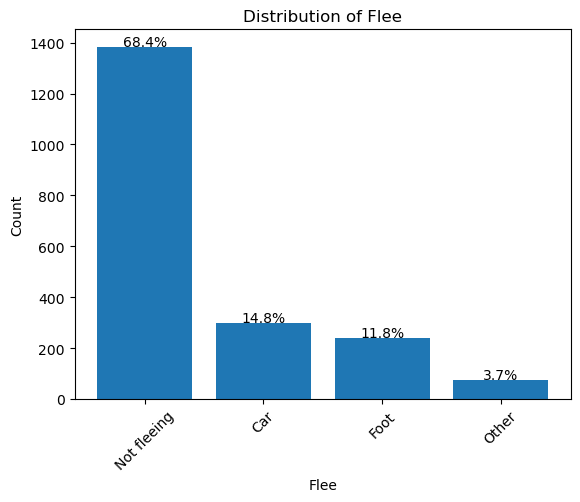

In [16]:
flee_counts = df['flee'].value_counts()

# Plot the bar graph
plt.bar(flee_counts.index, flee_counts.values)
flee_percentages = (flee_counts / len(df)) * 100


# Add percentage labels on top of each bar
for i, count in enumerate(flee_counts.values):
    percentage = flee_percentages[i]
    plt.text(i, count + 5, f"{percentage:.1f}%", ha='center')

# Add labels and title
plt.xlabel('Flee')
plt.ylabel('Count')
plt.title('Distribution of Flee')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [17]:
# Calculate the probabilities of each flee
flee_probabilities = df['flee'].value_counts(normalize=True)
flee_probabilities

# Fill in missing flee values with probabilities
missing_indices = df['flee'].isnull()
missing_count = missing_indices.sum()

for _ in range(missing_count):
    random_flee = random.choices(flee_probabilities.index, weights=flee_probabilities.values)[0]
    df.loc[missing_indices, 'flee'] = random_flee

In [18]:
df.count()

id                         2022
name                       2022
date                       2022
manner_of_death            2022
armed                      2022
age                        2022
gender                     2022
race                       2022
city                       2022
state                      2022
signs_of_mental_illness    2022
threat_level               2022
flee                       2022
body_camera                2022
dtype: int64

After cleaning the training set we observe that we have 2022 rows of data from initial 2028 rows 

In [19]:
# df.to_csv("/Users/snezhevets/Desktop/fatal_force/cleaned_fatal_force.csv", index=False)
# we save the cleaned saving data into a sepereate file

2. Handling the missing data for the training data set using the same steps above

In [20]:
testing_data = pd.read_csv("/Users/snezhevets/Desktop/fatal_force/police_killings_test.csv")

In [21]:
testing_data.count()

id                         507
name                       507
date                       507
manner_of_death            507
armed                      504
age                        467
gender                     507
race                       403
city                       507
state                      507
signs_of_mental_illness    507
threat_level               507
flee                       469
body_camera                507
dtype: int64

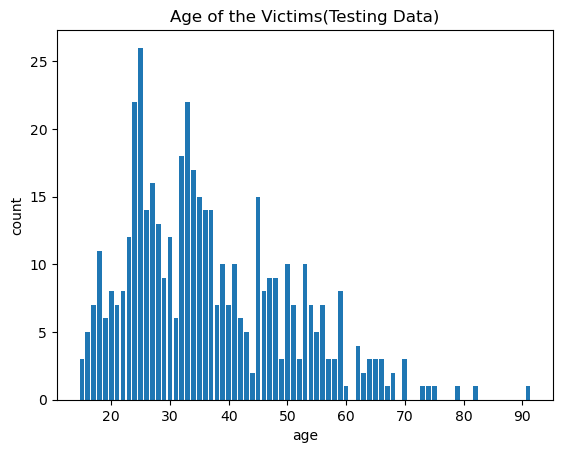

In [22]:
df_c = pd.DataFrame(testing_data)
age_count = df_c['age'].value_counts().sort_index()
plt.bar(age_count.index, age_count.values)
plt.xlabel('age')
plt.ylabel('count')
plt.title('Age of the Victims(Testing Data)')
plt.show()

In [23]:
# Calculate the mean age
mean_age = df_c['age'].mean()

# Calculate the median age
median_age = df_c['age'].median()

print("Mean age:", mean_age)
print("Median age:", median_age)

Mean age: 36.71092077087794
Median age: 34.0


In [24]:
# Replace missing age values with the median age
df_c['age'].fillna(mean_age, inplace=True)

In [25]:
# Remove rows with missing values in the armed feature
df_c.dropna(subset=['armed'], inplace=True)

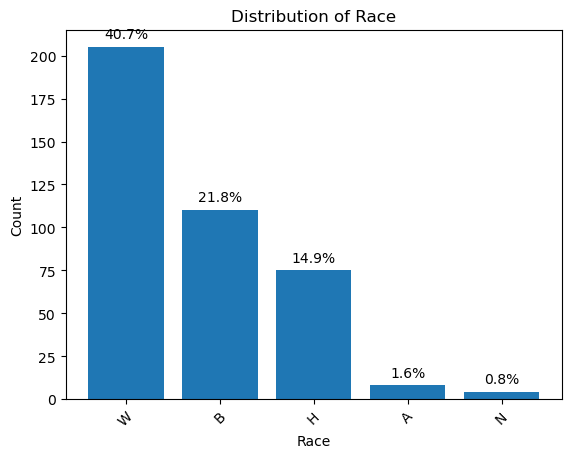

In [26]:
race_counts = df_c['race'].value_counts()

# Plot the bar graph
plt.bar(race_counts.index, race_counts.values)
race_percentages = (race_counts / len(df_c)) * 100

# Add percentage labels on top of each bar
for i, count in enumerate(race_counts.values):
    percentage = race_percentages[i]
    plt.text(i, count + 5, f"{percentage:.1f}%", ha='center')

# Add labels and title
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Distribution of Race')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [27]:
# Calculate the probabilities of each race
race_probabilities = df_c['race'].value_counts(normalize=True)

# Fill in missing race values with probabilities
missing_indices = df_c['race'].isnull()
missing_count = missing_indices.sum()

for _ in range(missing_count):
    random_race = random.choices(race_probabilities.index, weights=race_probabilities.values)[0]
    df_c.loc[missing_indices, 'race'] = random_race

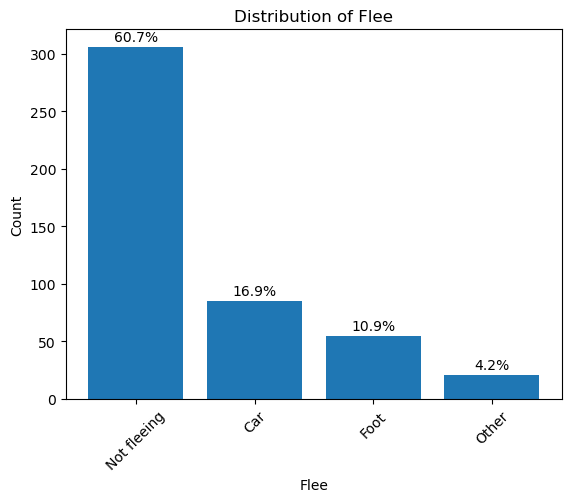

In [28]:
flee_counts = df_c['flee'].value_counts()

# Plot the bar graph
plt.bar(flee_counts.index, flee_counts.values)
flee_percentages = (flee_counts / len(df_c)) * 100


# Add percentage labels on top of each bar
for i, count in enumerate(flee_counts.values):
    percentage = flee_percentages[i]
    plt.text(i, count + 5, f"{percentage:.1f}%", ha='center')

# Add labels and title
plt.xlabel('Flee')
plt.ylabel('Count')
plt.title('Distribution of Flee')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [29]:
# Calculate the probabilities of each race
flee_probabilities = df_c['flee'].value_counts(normalize=True)
flee_probabilities

# Fill in missing flee values with probabilities
missing_indices = df_c['flee'].isnull()
missing_count = missing_indices.sum()

for _ in range(missing_count):
    random_flee = random.choices(flee_probabilities.index, weights=flee_probabilities.values)[0]
    df_c.loc[missing_indices, 'flee'] = random_flee

In [30]:
#df_c.to_csv("/Users/snezhevets/Desktop/fatal_force/testing_cleaned_fatal_force.csv", index=False)

Now we have done cleaning the data for testing and training data, we move on to analyse and answer questions based on the training data

In [31]:
df_c.count()

id                         504
name                       504
date                       504
manner_of_death            504
armed                      504
age                        504
gender                     504
race                       504
city                       504
state                      504
signs_of_mental_illness    504
threat_level               504
flee                       504
body_camera                504
dtype: int64

# Exploratory Data Analysis (EDA)

Uploading the data from the cleaning above. Change the directory if needed.

In [32]:
data_train = pd.read_csv("/Users/snezhevets/Desktop/fatal_force/cleaned_train_police_killings.csv")

In [33]:
data_test = pd.read_csv("/Users/snezhevets/Desktop/fatal_force/cleaned_test_police_killings.csv")

In [34]:
# making data frames for both sets
df_train = pd.DataFrame(data_train)

df_test = pd.DataFrame(data_test)

**1.** **Which state has the most fatal police shootings? Which city is the most dangerous?**

In [35]:
state_count = df_train['state'].value_counts().sort_index()

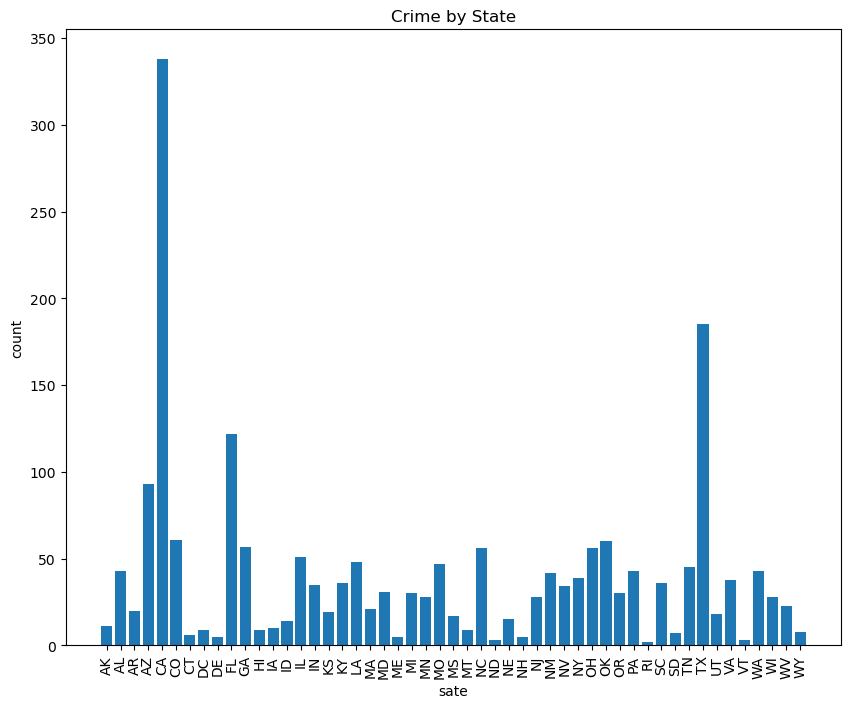

In [36]:
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed

plt.bar(state_count.index, state_count.values)

plt.xlabel('sate')
plt.xticks(rotation=90)  
plt.ylabel('count')
plt.title('Crime by State')
plt.show()

California is the state with most fatal police shootings with a total 338 recorded incident, followed by TX with 186 of cases California has.

In [37]:
state_with_max_data = df_train['state'].value_counts().idxmax()


In [38]:
# Filter the DataFrame based on the state with the most data
state_data = df_train[df_train['state'] == state_with_max_data]

In [39]:
# Group the data by city and count the occurrences
city_counts = state_data['city'].value_counts()

In [40]:
#Select the top N most frequent categories to focus on
top_n = 10  # Set the desired number of top categories to display
top_city_data = city_counts.head(top_n)


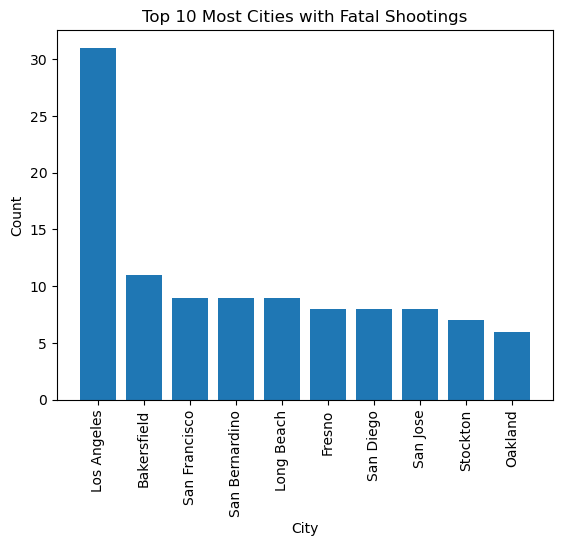

In [41]:
# Create the bar graph
plt.bar(top_city_data.index, top_city_data.values)
plt.xlabel('City')
plt.ylabel('Count')
plt.title(f'Top {top_n} Most Cities with Fatal Shootings')
plt.xticks(rotation=90)
plt.show()

Los Angeles is the most dangerous city in terms of police killings with 31 such cases in the city alone. Followed by Bakersfield with 11 cases recorded.

**2.** **What is the most common way of being armed?**

In [42]:
# Filter the DataFrame to include only the "armed" column
armed_data = df_train['armed'].value_counts()

In [43]:
#Select the top N most frequent categories to focus on
top_n = 10  # Set the desired number of top categories to display
top_armed_data = armed_data.head(top_n)

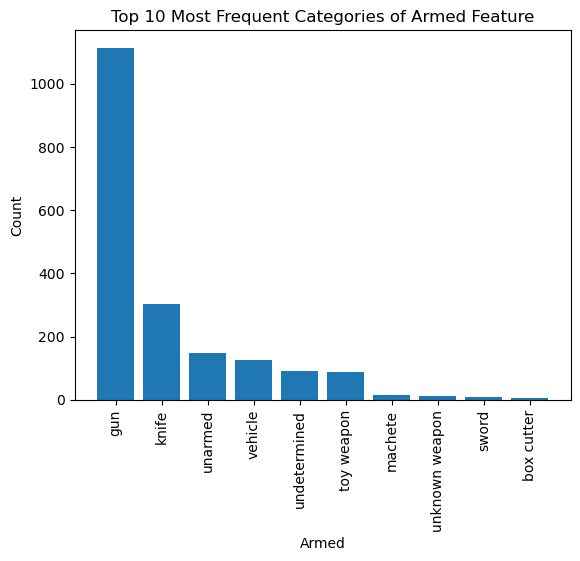

In [44]:
# Filter the DataFrame to include only the "armed" column
armed_data = df_train['armed'].value_counts()

# Create the bar graph
plt.bar(top_armed_data.index, top_armed_data.values)
plt.xlabel('Armed')
plt.ylabel('Count')
plt.title(f'Top {top_n} Most Frequent Categories of Armed Feature')
plt.xticks(rotation=90)
plt.show()

In [45]:
armed_data.head()

gun             1114
knife            304
unarmed          148
vehicle          125
undetermined      91
Name: armed, dtype: int64

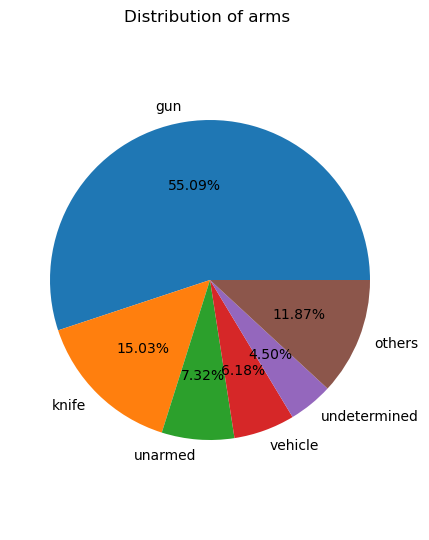

In [46]:
fig = plt.figure(figsize=(4,5))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
plt.title('Distribution of arms ')
arms = ['gun', 'knife', 'unarmed', 'vehicle', 'undetermined','others' ]
shootings = [1114,304,148,125,91,240]
ax.pie(shootings, labels = arms,autopct='%1.2f%%')
plt.show()

The most common way of being armed is carrying a gun with 1114 being 55.09%, following by carrying a knife, 304, with 15.03%

**3.** **What is the age distribution of the victims? Compare age distribution of different races?**

Age distribution of entire data set is as follows :

In [47]:
age_counts = df_train['age'].value_counts()

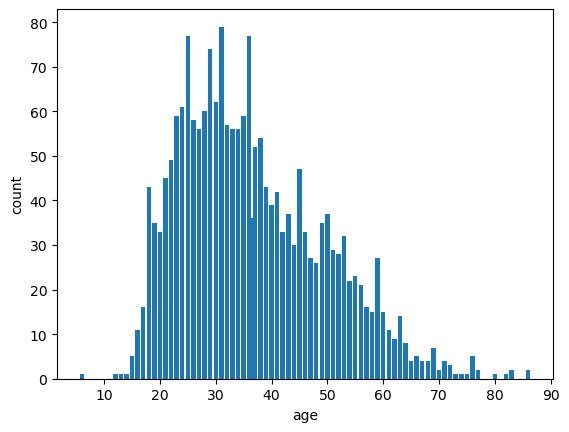

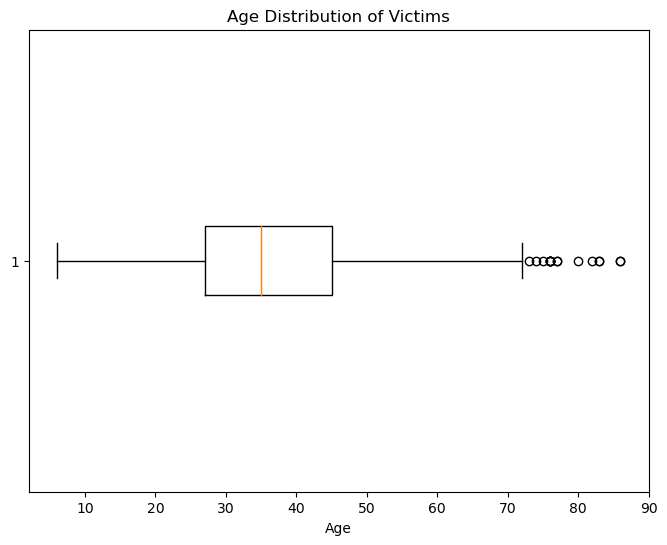

In [48]:
# Plot the bar graph
plt.xlabel('age')
plt.ylabel('count')
plt.bar(age_counts.index, age_counts.values)
age_percentages = (age_counts / len(df_train)) * 100

# Boxplot of age distribution
plt.figure(figsize=(8, 6))
plt.boxplot(df_train['age'], vert=False)
plt.title('Age Distribution of Victims')
plt.xlabel('Age')
plt.show()

In [49]:
print(df_train["age"].describe())
print("Mode of the data",df_train["age"].mode())

count    2022.000000
mean       36.565233
std        12.776698
min         6.000000
25%        27.000000
50%        35.000000
75%        45.000000
max        86.000000
Name: age, dtype: float64
Mode of the data 0    31.0
Name: age, dtype: float64


The Median age of victims killed due to police killings is 35, therefore 50% of the victims in our data are below the age of 35. The box plot above shows that people of age 27-45 are most likely to be victims of police killings rather than teens or elderly people.

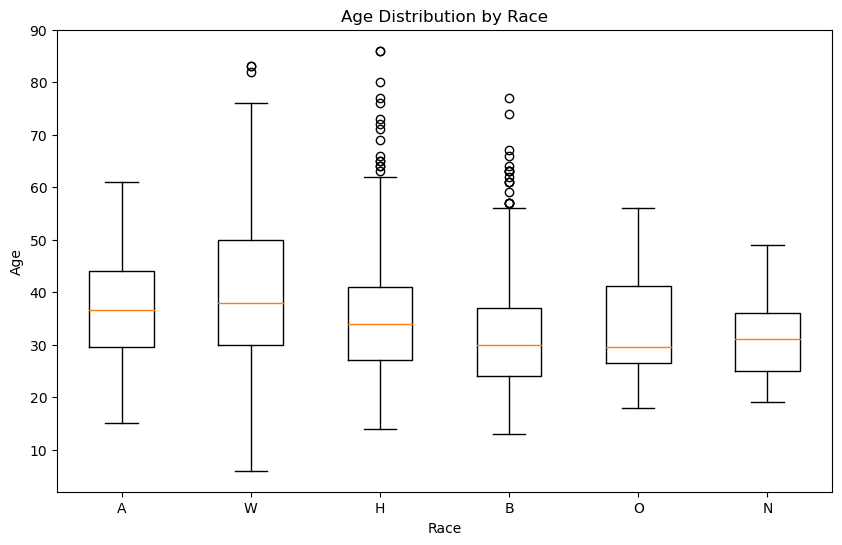

In [50]:
# Create a dictionary to store race-wise age data
age_data = {}

# Populate the dictionary with race and age data
for race in df_train['race'].unique():
    age_data[race] = df_train[df_train['race'] == race]['age']

# Create a list of age values for each race
age_values = [age_data[race] for race in df_train['race'].unique()]

# Create the boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(age_values, labels=df_train['race'].unique())

# Set plot title and axis labels
plt.title('Age Distribution by Race')
plt.xlabel('Race')
plt.ylabel('Age')

# Show the plot
plt.show()

The common characteristic between all of the distributions was that the age range of most of the victims was late twenties to early forties. The highest mean age was seen among the **white race**. The mean age of the other races was around the same range (27 years - 45 years). The youngest person killed was found to be 6 years old White kid and the oldest person killed in our data set was 86 year old White person. The most frequently occurring age in our data set was found to be 31 years.

**4.** **Compare the total number of people killed per race. Compare the number of people killed per race as a proportion of respective races. What difference do you observe?**

In [51]:
race_counts = df_train['race'].value_counts()


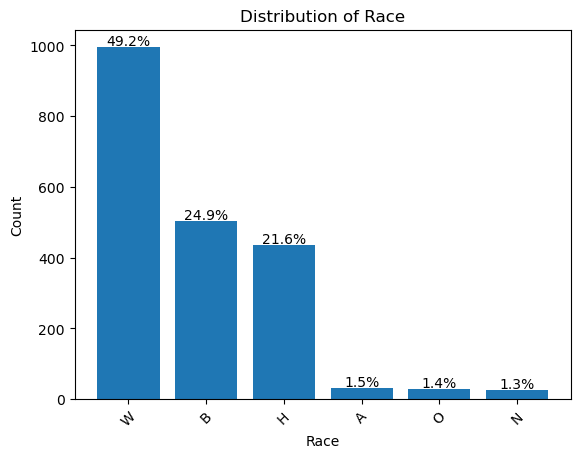

In [52]:
# Plot the bar graph
plt.bar(race_counts.index, race_counts.values)
race_percentages = (race_counts / len(df_train)) * 100


# Add percentage labels on top of each bar
for i, count in enumerate(race_counts.values):
    percentage = race_percentages[i]
    plt.text(i, count + 5, f"{percentage:.1f}%", ha='center')

# Add labels and title
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Distribution of Race')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [53]:
race_data = pd.read_csv("/Users/snezhevets/Desktop/fatal_force/share_race_by_city.csv")

In [54]:
race_columns = ['share_white', 'share_black', 'share_hispanic','share_asian', 'share_native_american']

In [55]:
race_data[race_columns] = race_data[race_columns].apply(pd.to_numeric, errors='coerce')


In [56]:
# Calculate average values
average_race = {}
for column in race_columns:
    average_race[column] = race_data[column].mean()

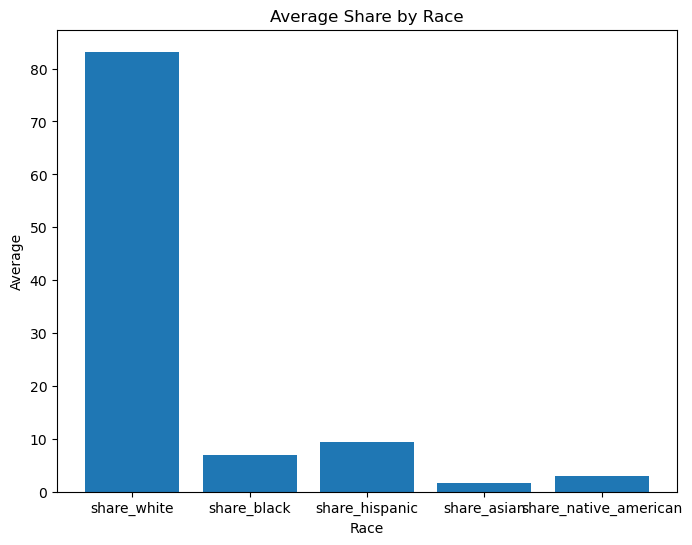

In [57]:
# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(average_race.keys(), average_race.values())
plt.xlabel("Race")
plt.ylabel("Average")
plt.title("Average Share by Race")
plt.show()

from the two plots above we notice, out of all the shooting about 50% involved race 'white' but comparing to the ration of the population we notice that 'white' population consisnt of more than 80% of the population. however we notive that the next most fatal shooting incidents involve 'black' race having 25% of shooting incidents, but their share ration across population is only about 9%, this signifies that more fatal shooting by police occur with 'black' race comaring their population size. Additional we notice that 'hispanic' race share 22% of the shooting incidents and their share of the population is about 10%. 

## **Extra EDA:**

**5.**  How was the distribution of the victims identified with a mental illness between the different races?

In [58]:
# Filter the data for victims claimed to show and not show a sign of mental illness
mental_illness_data = df_train[df_train['signs_of_mental_illness'] == True]
no_mental_illness_data = df_train[df_train['signs_of_mental_illness'] == False]


In [59]:
# Group the data by race and calculate the counts
mental_illness_counts = mental_illness_data.groupby('race').size().sort_values(ascending=False)
no_mental_illness_counts = no_mental_illness_data.groupby('race').size().sort_values(ascending=False)


In [60]:
# Calculatethe total number of shootings for each race
total_shootings = mental_illness_counts + no_mental_illness_counts

In [61]:
# Calculate the ratio of shootings with mental illness to total shootings for each race
mental_illness_ratio = mental_illness_counts / total_shootings
no_mental_illness_ratio = no_mental_illness_counts / total_shootings

In [62]:
# Get the unique race categories sorted based on mental illness counts
race_categories = mental_illness_counts.index

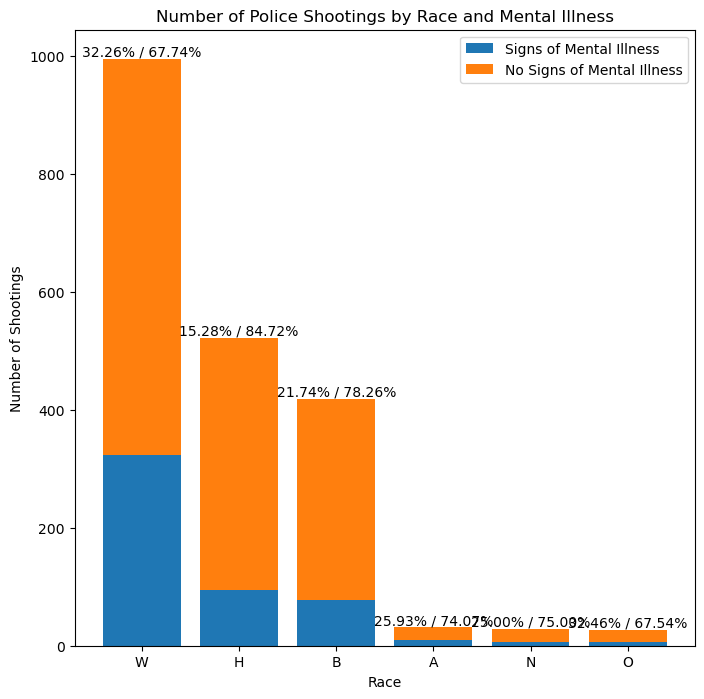

In [63]:
# Plot the bar chart with ratios
plt.figure(figsize=(8, 8))
plt.bar(race_categories, mental_illness_counts, label='Signs of Mental Illness')
plt.bar(race_categories, no_mental_illness_counts, label='No Signs of Mental Illness', bottom=mental_illness_counts)
plt.xlabel("Race")
plt.ylabel("Number of Shootings")
plt.title("Number of Police Shootings by Race and Mental Illness")

# Plot the ratios as text annotations above the bars
for i, race in enumerate(race_categories):
    x = i
    y = mental_illness_counts[i] + no_mental_illness_counts[i]
    ratio_text = f"{mental_illness_ratio[i]*100:.2f}% / {no_mental_illness_ratio[i]*100:.2f}%"
    plt.text(x, y, ratio_text, ha='center', va='bottom')

plt.legend()
plt.show()

Based on the results found we see that the biggest ration of metal illness and no metal illness is shared across 'white' race with ration of 33/67, meaning that the shooting could be justified by the state of the victim. 

# Data Preprocessing

Prepared data for the models in part two by assigning each of the categories with corresponding numbers(label encoding). Note that we cannot using strings, boolean values, or characters in our models

In [64]:
#train_data = pd.read_csv('/Users/snezhevets/Desktop/fatal_force/cleaned_train_police_killings.csv')
#test_data = pd.read_csv('/Users/snezhevets/Desktop/fatal_force/cleaned_test_police_killings.csv')

In [65]:
test_data = pd.DataFrame(data_test)
train_data = pd.DataFrame(data_train)

In [66]:
# Drop the column from the DataFrame
train_data = train_data.drop("date", axis=1)
test_data = test_data.drop("date", axis=1)

In [67]:
race_map = {"W":1,"B":2,"A":3,"N":4,"H":6,"O":5, 1:1, 2:2, 3:3, 4:4, 5:5, 6:6}

gender_map = {"M":1,"F":2,1:1,2:2}

flee_map = {"Not fleeing":1,"Car":2,"Foot":3,"Other":4,1:1,2:2,3:3,4:4}

threat_level_map = {"attack":1,"other":2,"undetermined":3,1:1,2:2,3:3}

death_map = {"shot":1,"shot and Tasered":2,1:1,2:2}

mental_illness_map = {True:1,False:2,1:1,2:2}

body_camera_map = {True:1,False:2,1:1,2:2}



In [68]:
train_data['race'] = train_data['race'].map(race_map)
test_data['race'] = test_data['race'].map(race_map)

train_data['gender'] = train_data['gender'].map(gender_map)
test_data['gender'] = test_data['gender'].map(gender_map)

train_data['flee'] = train_data['flee'].map(flee_map)
test_data['flee'] = test_data['flee'].map(flee_map)

train_data['threat_level'] = train_data['threat_level'].map(threat_level_map)
test_data['threat_level'] = test_data['threat_level'].map(threat_level_map)

train_data['manner_of_death'] = train_data['manner_of_death'].map(death_map)
test_data['manner_of_death'] = test_data['manner_of_death'].map(death_map)

train_data['signs_of_mental_illness'] = train_data['signs_of_mental_illness'].map(mental_illness_map)
test_data['signs_of_mental_illness'] = test_data['signs_of_mental_illness'].map(mental_illness_map)

train_data['body_camera'] = train_data['body_camera'].map(body_camera_map)
test_data['body_camera'] = test_data['body_camera'].map(body_camera_map)



In [69]:
#ARMED
unique_armed_methods = train_data['armed'].value_counts().index.tolist()
armed_map = {}
for i in range(len(unique_armed_methods)):
  armed_map[unique_armed_methods[i]] = i+1

train_data['armed'] = train_data['armed'].map(armed_map)

unique_armed_methods2 = test_data['armed'].value_counts().index.tolist()
armed_map2 = {}
for i in range(len(unique_armed_methods2)):
  armed_map2[unique_armed_methods2[i]] = i+1
test_data['armed'] = test_data['armed'].map(armed_map2)

#CITY
unique_city_methods = train_data['city'].value_counts().index.tolist()
city_map = {} 

for i in range(len(unique_city_methods)):
  city_map[unique_city_methods[i]] = i+1

train_data['city'] = train_data['city'].map(city_map)

unique_city_methods2 = test_data['city'].value_counts().index.tolist()
city_map2 = {}

for i in range(len(unique_city_methods2)):
  city_map2[unique_city_methods2[i]] = i+1
test_data['city'] = test_data['city'].map(city_map2)

#STATE
unique_state_methods = train_data['state'].value_counts().index.tolist()
state_map = {}

for i in range(len(unique_state_methods)):
  state_map[unique_state_methods[i]] = i+1

train_data['state'] = train_data['state'].map(state_map)
test_data['state'] = test_data['state'].map(state_map)

In [70]:
# This is formatted as code

Our data is now ready for modelling !

Pearson Correlation of features

This is a heatmap which shows the Pearson correlation coefficeints between our different variables. The state, age, and city categories show the highest correlation coefficient with the victim's race. Other features that show interesting correlations with eachother are:

Signs of Mental illness and flee (0.2)
Threat level and armed (0.17)
Manner of death and armed(0.16)

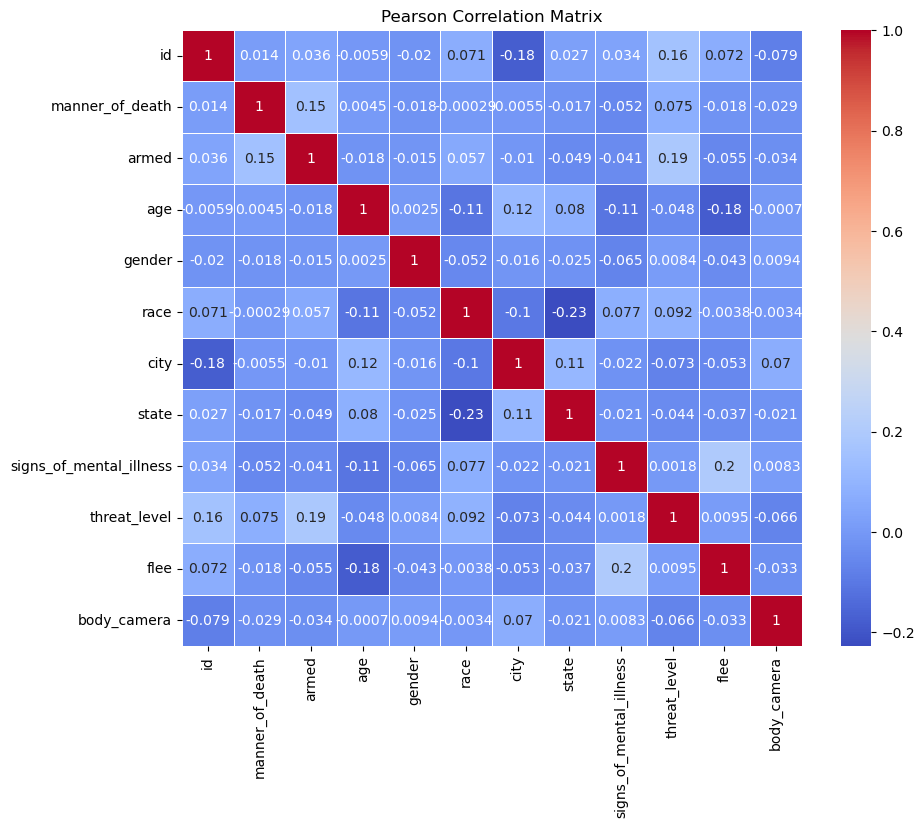

In [71]:
# Calculate Pearson correlation matrix
correlation_matrix = train_data.corr(numeric_only=True)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Pearson Correlation Matrix')
plt.show()

# PREDICTION AND MODELING

Printing a classification report which has fields precision, recall, f1-score and support which will provide us information about accuracy of our model.
Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.
Recall: Recall is the ratio of correctly predicted positive observations to the all observations in actual class
F1- score: This is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account.

# 1. Classification using Multiple Logistic regreession


Multiple logistic regression is a classification technique that predicts categorical outcomes using multiple independent variables. It estimates class probabilities through a logistic function and assigns observations to the class with the highest probability. It assumes linear relationships and is suitable for multiclass classification tasks.

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [73]:
y_train = train_data['race']
X_train = train_data.drop(['race','name'], axis=1)
y_test = test_data['race']
X_test = test_data.drop(['race','name'], axis=1)

In [74]:
model_lg = LogisticRegression(random_state=0, multi_class='multinomial', penalty=None, solver='newton-cg', max_iter=2500).fit(X_train, y_train)


     W   B  A  N   H
W  205  18  0  3  81
B   55  32  0  0  23
A    4   1  0  0   3
N    2   0  0  0   2
H   24  11  0  0  40


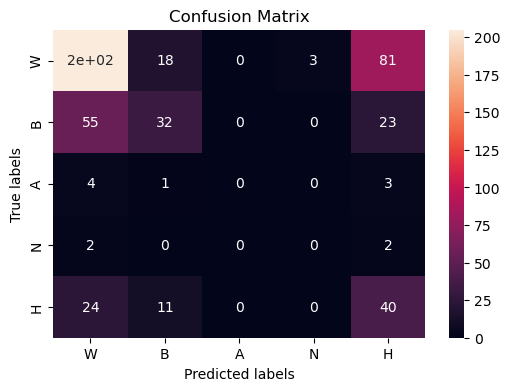

In [75]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
y_pred = model_lg.predict(X_test)
confm = np.array(confusion_matrix(y_test,y_pred,labels=[1,2,3,4,6]))
conf_matrix= pd.DataFrame(confm, index=['W', 'B','A','N','H'],columns=['W','B','A','N','H'])
print(conf_matrix)

plt.figure(figsize=(6,4))
ax= plt.subplot()
sns.heatmap(conf_matrix, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [76]:
print(classification_report(y_test,y_pred))
print("Overall Accuracy of the model is :" ,accuracy_score(y_test, y_pred)*100, "%") 

              precision    recall  f1-score   support

           1       0.71      0.67      0.69       307
           2       0.52      0.29      0.37       110
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         4
           6       0.27      0.53      0.36        75

    accuracy                           0.55       504
   macro avg       0.30      0.30      0.28       504
weighted avg       0.58      0.55      0.55       504

Overall Accuracy of the model is : 54.96031746031746 %


# 2. Classification using K nearest neighbours classifier

The K nearest algorithm is a type of supervised learning method used for classification. It categorizes new data by comparing its similarity to existing data. It determines the classification of a new data point based on the classifications of its K nearest neighbors. In this particular case, the optimal value for K is determined as the square root of the total number of samples in the training data, which is 2022. Therefore, the value of K is set to 45.

     W  B  A  N  H
W  307  0  0  0  0
B  110  0  0  0  0
A    8  0  0  0  0
N    4  0  0  0  0
H   75  0  0  0  0


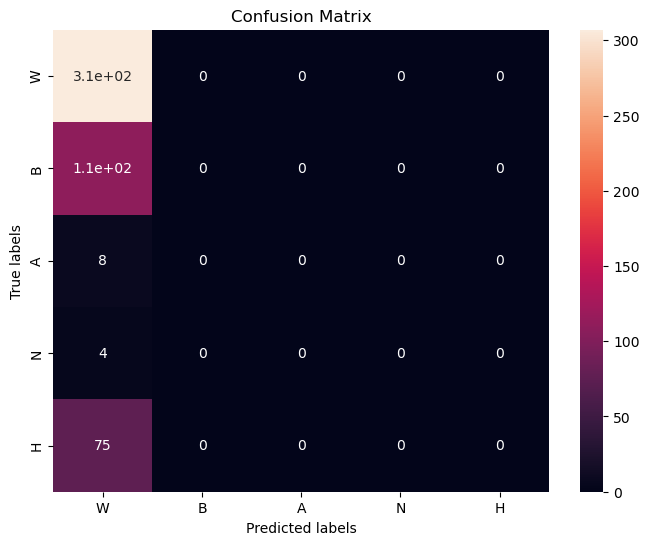

In [77]:
import math
math.ceil(math.sqrt(train_data.shape[0]))
y_train = train_data['race']
X_train = train_data.drop(['race', 'name'], axis=1)
y_test = test_data['race']
X_test = test_data.drop(['race', 'name'], axis=1)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 45)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

confusion_m = np.array(confusion_matrix(y_test,y_pred,labels=[1,2,3,4,6]))
conf_matrix= pd.DataFrame(confusion_m, index=['W','B','A','N','H'],columns=['W','B','A','N','H'])
print(conf_matrix)

plt.figure(figsize=(8,6))
ax= plt.subplot()
sns.heatmap(conf_matrix, annot=True, ax = ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

Printing a classification report which has fields precision, recall, f1-score and support which will provide us information about accuracy of our model.

Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.

Recall: Recall is the ratio of correctly predicted positive observations to the all observations in actual class

F1- score: This is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account.

In [78]:
print(classification_report(y_test,y_pred))
print("Overall Accuracy of the model is :" ,accuracy_score(y_test, y_pred)*100, "%")

              precision    recall  f1-score   support

           1       0.61      1.00      0.76       307
           2       0.00      0.00      0.00       110
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         4
           6       0.00      0.00      0.00        75

    accuracy                           0.61       504
   macro avg       0.12      0.20      0.15       504
weighted avg       0.37      0.61      0.46       504

Overall Accuracy of the model is : 60.912698412698404 %


# 3. Classification using Decision Tree Classifier

A decision tree is a supervised learning technique that utilizes a structure resembling a flowchart. Each internal node of the tree represents a test performed on a specific attribute, and each branch indicates the outcome of that test. The leaf nodes, on the other hand, represent class labels. The tree continues to split into nodes until either the maximum depth is reached or the purity threshold for each leaf node is achieved. The maximum depth of a decision tree can be determined by adding 1 to the number of features. In this scenario, classification is conducted using a decision tree with a max_depth value of 4.    

     W  B  A  N  H
W  307  0  0  0  0
B  110  0  0  0  0
A    8  0  0  0  0
N    4  0  0  0  0
H   75  0  0  0  0


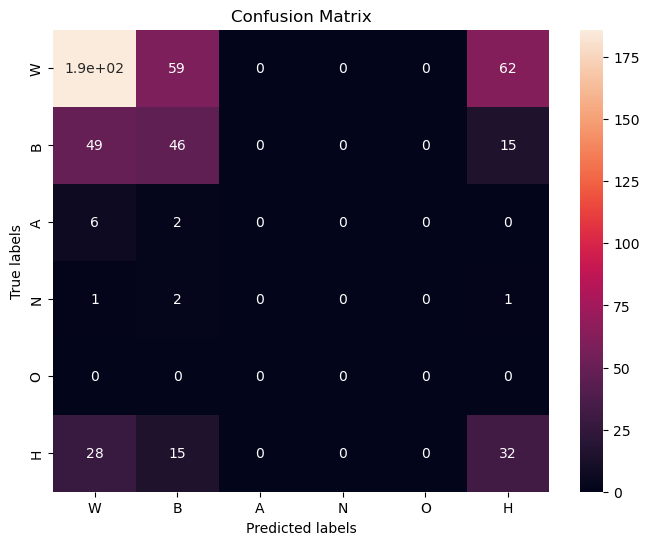

In [79]:
regr_1 = DecisionTreeClassifier(max_depth=4)
regr_1.fit(X_train, y_train)
y_pred = regr_1.predict(X_test)
confusion_m = np.array(confusion_matrix(y_test,y_pred,labels=[1,2,3,4,5,6]))
confusion_matrix= pd.DataFrame(confusion_m, index=['W','B','A','N','O','H'], columns=['W','B','A','N','O','H'])
print(conf_matrix)

plt.figure(figsize=(8,6))
ax= plt.subplot()
sns.heatmap(confusion_matrix, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

In [80]:
print(classification_report(y_test, y_pred))
print("Overall Accuracy of the model is :" ,accuracy_score(y_test, y_pred)*100, "%") 

              precision    recall  f1-score   support

           1       0.69      0.61      0.64       307
           2       0.37      0.42      0.39       110
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         4
           6       0.29      0.43      0.35        75

    accuracy                           0.52       504
   macro avg       0.27      0.29      0.28       504
weighted avg       0.54      0.52      0.53       504

Overall Accuracy of the model is : 52.38095238095239 %


# Conclusion:


We found that Logistic Regression gave an overall accuracy of 55%, the Decision Tree Clasifier gave an overall accuracy of about 54% while the K Nearest Neighbour classifier with k = 45. We saw that the pearson correlation with target variable race was low therefore according to data set police killings do not depend on the race of the victim. Also, our features were not the best predictor for race. While cleansing the data sets I also found that there were a high number of missing values in our dataset in fields 'age', 'race', 'flee' and a few missing values in 'armed' field.
The other 4 data sets encountered an even high percentage of missing values, in comparison to the training and testing data sets. Even though we imputed the missing values using methods like interpolation , mean value, and mode, the presence of a high number of these values might have led to the low accuracy of the model.